<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Text Preprocessing for NLP

Women's E-Commerce Clothing Reviews
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

이번 과제의 목표는: 캐글 옷 리뷰 데이터의 텍스트 칼럼(`Review Text`)에서 토큰(단어)를 추출하고 추천(`Recommended IND`)을 할지(1) 안 할지(0)에 따른 토큰의 빈도를 살펴 보는 것 입니다.

토큰을 분리하기 위해 사용 가능한 정제기술을 모두 사용하고 특히
- Lemmatization
- 확장된 불용어 처리
기술을 잘 활용해 보세요

토큰이 만들어지면 꼭 **올바른 토큰화**를 잘 만족하는지 확인 합니다. 그리고 결과를 분석하여 어떤 특성이 추천에 이르게 하는지 그래프로 설명하세요. 마크다운 셀을 최대한 활용하여 결과를 분석해 보시기 바랍니다.

### 1) Spacy 코스를 수강하세요
- chapter1의 1~5 강좌 수강 (https://course.spacy.io/en/)
  - 챕터 1, 2, 3, 4, 5를 수강하는 것은 아닙니다!
- 문항 1) chapter1-5의 강의를 들으시고, 해당 제목을 입력하시오.

1. Introduction to spaCy
2. Getting Started
3. Documents, spans and tokens
4. Lexical attributes
5. Statistical models 

### 2) 토큰을 정제합니다. 
- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거

- 문항 2-1) 소문자로 변경하는 함수를 입력하시오. 
- 문항 2-2) re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하시오. 

2-1) str.lower()
2-2) re.sub("[^a-z0-9 ]", "", text)

In [6]:
from google.colab import files
 # 파일을 불러올 수 있는 코드
uploaded = files.upload()

Saving women_clothing_reciew.csv.csv to women_clothing_reciew.csv.csv


In [8]:
### 이곳에서 과제를 진행해 주세요 ### 
import pandas as pd
df=pd.read_csv('women_clothing_reciew.csv.csv', encoding='CP949', index_col=0)
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [9]:
df.shape

(23486, 10)

In [10]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [40]:
df = df[df['Review Text'].notna()]

In [41]:
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [42]:
import re
'''
def tokenize(text):
    tokens = re.sub(r'[^a-zA-Z0-9 ]', "", text)
    tokens = tokens.lower().split()
    return tokens
'''
for idx, text in zip(df.index, df['Review Text']):
    text = text.lower()
    text = re.sub(r'[^a-z0-9 ]', '', text)
    df['Review Text'][idx] = text


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [43]:
df['Review Text'].head()

0    absolutely wonderful  silky and sexy and comfo...
1    love this dress  its sooo pretty  i happened t...
2    i had such high hopes for this dress and reall...
3    i love love love this jumpsuit its fun flirty ...
4    this shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [44]:
tokens = []

for text in tokenizer.pipe(df['Review Text']):
    text_tokens = [token.text for token in text if token.text!=' ']
    tokens.append(text_tokens)

df['tokens'] = tokens
df['tokens'].head()

0    [absolutely, wonderful, silky, and, sexy, and,...
1    [love, this, dress, its, sooo, pretty, i, happ...
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, love, love, this, jumpsuit, its, fun...
4    [this, shirt, is, very, flattering, to, all, d...
Name: tokens, dtype: object

### 3) 정제한 토큰을 시각화 합니다.
- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화 합니다.
- 추천(recommended_ind)/비추천에 따라 비교되는 토큰을 시각화 합니다.
- 문항 3) 추천 토큰 순위 10개 단어를 입력하시오.

In [45]:
pip install squarify

In [46]:
### 이곳에서 과제를 진행해 주세요 ### 
from collections import Counter
import re
import pandas as pd

# squarify treemap
import squarify

import matplotlib.pyplot as plt
import seaborn as sns

# # spacy: NLP library
# import spacy
# from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [47]:
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [50]:
wc = word_count(df['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
38,the,19673,75568,1.0,0.055759,0.055759,0.868910
29,i,18902,58428,2.0,0.043112,0.098871,0.834857
5,and,19535,48805,3.0,0.036011,0.134882,0.862815
30,a,17747,42776,4.0,0.031563,0.166445,0.783843
24,it,16284,42325,5.0,0.031230,0.197675,0.719226


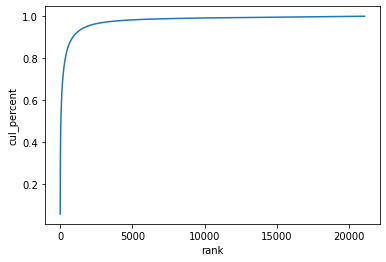

In [51]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [52]:
wc[wc['rank'] <= 1000]['cul_percent'].max()

0.9112393682997313

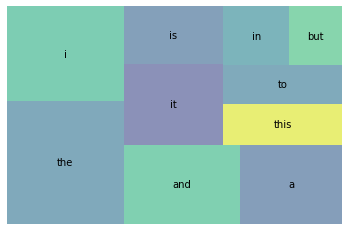

In [53]:
wc_top10 = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_top10['percent'], label=wc_top10['word'], alpha=0.6 )
plt.axis('off')
plt.show()

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.

- 문항 4) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하시오.

In [57]:
STOP_WORDS = nlp.Defaults.stop_words

In [59]:
tokens = []

for doc in tokenizer.pipe(df['Review Text']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS and token.text != ' ':
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [60]:
wc_stop_word = word_count(df['tokens'])
wc_stop_word.head(30)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
23,dress,6034,10428,1.0,0.017780,0.017780,0.266508
17,love,7386,8883,2.0,0.015145,0.032925,0.326222
40,size,6517,8653,3.0,0.014753,0.047678,0.287841
48,fit,6107,7191,4.0,0.012261,0.059939,0.269732
127,like,5722,6984,5.0,0.011908,0.071846,0.252727
62,wear,5514,6407,6.0,0.010924,0.082770,0.243540
61,great,5157,6053,7.0,0.010320,0.093090,0.227773
14,im,4852,5910,8.0,0.010076,0.103167,0.214301
174,fabric,4102,4731,9.0,0.008066,0.111233,0.181176
35,small,3643,4530,10.0,0.007724,0.118956,0.160903


In [61]:
STOP_WORDS = nlp.Defaults.stop_words.union(['im'])

In [62]:
tokens = []

for doc in tokenizer.pipe(df['Review Text']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS and token.text != ' ':
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

wc_extended_stop_word = word_count(df['tokens'])
wc_extended_stop_word.head(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
22,dress,6034,10428,1.0,0.017961,0.017961,0.266508
16,love,7386,8883,2.0,0.015300,0.033260,0.326222
39,size,6517,8653,3.0,0.014903,0.048163,0.287841
47,fit,6107,7191,4.0,0.012385,0.060549,0.269732
126,like,5722,6984,5.0,0.012029,0.072577,0.252727
61,wear,5514,6407,6.0,0.011035,0.083612,0.243540
60,great,5157,6053,7.0,0.010425,0.094038,0.227773
173,fabric,4102,4731,8.0,0.008148,0.102186,0.181176
34,small,3643,4530,9.0,0.007802,0.109988,0.160903
91,color,3999,4530,10.0,0.007802,0.117791,0.176626


### 5) 통계적 트리밍 사용 전/후 토큰 분포를 비교합니다.
- 문서 등장 비율이 20% 미만이고, 최소 1% 이상 등장하는 단어만 선택한 뒤,
- 통계적 트리밍 사용 전/후 토큰 분포 시각화하고,
- 문항 5-1) 통계적 트리밍 후 상위 토큰 10개의 단어를 입력하시오.
- 문항 5-2) 불용어 처리 & 통계적 트리밍 후 상위 토큰 10개의 단어를 입력하시오.

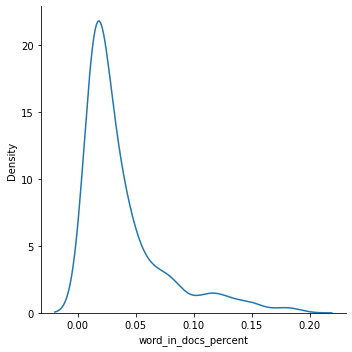

In [63]:
wc_trimmed = wc[wc['word_in_docs_percent'] >= 0.01]
wc_trimmed = wc_trimmed[wc_trimmed['word_in_docs_percent'] < 0.2]
sns.displot(wc_trimmed['word_in_docs_percent'], kind='kde');

In [64]:
wc_trimmed.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
242,you,3892,5158,40.0,0.003806,0.473680,0.171901
33,would,4284,5004,41.0,0.003692,0.477372,0.189214
298,they,3087,4936,42.0,0.003642,0.481014,0.136346
181,at,4050,4792,43.0,0.003536,0.484550,0.178879
252,fabric,4102,4731,44.0,0.003491,0.488041,0.181176
54,up,4175,4717,45.0,0.003481,0.491522,0.184400
63,small,3643,4530,46.0,0.003343,0.494864,0.160903
145,color,3999,4530,47.0,0.003343,0.498207,0.176626
173,look,3490,4001,48.0,0.002952,0.501159,0.154145
293,more,3420,3917,49.0,0.002890,0.504049,0.151053


In [65]:
wc_trimmed['word'].head(10)

242       you
33      would
298      they
181        at
252    fabric
54         up
63      small
145     color
173      look
293      more
Name: word, dtype: object

In [66]:
wc_extended_stop_word = word_count(df['tokens'])
wc_extended_stop_word = wc_extended_stop_word[wc_extended_stop_word['word_in_docs_percent'] >= 0.01]
wc_extended_stop_word = wc_extended_stop_word[wc_extended_stop_word['word_in_docs_percent'] < 0.2]
wc_extended_stop_word.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
173,fabric,4102,4731,8.0,0.008148,0.102186,0.181176
34,small,3643,4530,9.0,0.007802,0.109988,0.160903
91,color,3999,4530,10.0,0.007802,0.117791,0.176626
111,look,3490,4001,11.0,0.006891,0.124682,0.154145
11,ordered,3449,3824,12.0,0.006586,0.131268,0.152334
13,little,3282,3768,13.0,0.006490,0.137758,0.144958
69,perfect,3337,3718,14.0,0.006404,0.144161,0.147387
75,flattering,3292,3458,15.0,0.005956,0.150117,0.145400
510,soft,3140,3297,16.0,0.005679,0.155796,0.138686
4,comfortable,2912,3016,17.0,0.005195,0.160990,0.128616


In [67]:
wc_extended_stop_word['word'].head(10)

173         fabric
34           small
91           color
111           look
11         ordered
13          little
69         perfect
75      flattering
510           soft
4      comfortable
Name: word, dtype: object

### 6) Lemmatization 사용 효과를 분석해 봅니다.
- 문항 6-1) Stemming한 뒤 상위 10개 단어를 입력하시오.
- 문항 6-2) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하시오.

In [68]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

tokens = []
for doc in df['tokens']:
    doc_tokens = []
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df['stems'] = tokens

In [69]:
wc_stem = word_count(df['stems'])

wc_stem_top10 = wc_stem[wc_stem['rank'] <= 10]

wc_stem_top10

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
22,dress,6747,12022,1.0,0.020706,0.020706,0.297999
15,love,9165,11302,2.0,0.019466,0.040172,0.404797
47,fit,8971,11252,3.0,0.019380,0.059551,0.396228
40,size,7446,10551,4.0,0.018172,0.077724,0.328872
109,look,7116,9253,5.0,0.015937,0.093661,0.314297
60,wear,6672,8037,6.0,0.013842,0.107503,0.294687
123,like,6207,7705,7.0,0.013271,0.120774,0.274149
87,color,6093,7142,8.0,0.012301,0.133075,0.269114
59,great,5158,6054,9.0,0.010427,0.143502,0.227817
9,order,4198,4975,10.0,0.008569,0.152070,0.185416


In [70]:
wc_stem_top10['word']

22     dress
15      love
47       fit
40      size
109     look
60      wear
123     like
87     color
59     great
9      order
Name: word, dtype: object

In [71]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [72]:
df['lemmas'] = df['Review Text'].apply(get_lemmas)

In [73]:
tokens_lemma = []

for doc in df['lemmas']:
    
    doc_tokens = []
    
    for token in doc: 
        if token not in STOP_WORDS and token != ' ':
            doc_tokens.append(token)
   
    tokens_lemma.append(doc_tokens)
    
df['tokens_lemma'] = tokens_lemma
df['tokens_lemma']

0        [absolutely, wonderful, silky, sexy, comfortable]
1        [love, dress, sooo, pretty, happen, find, stor...
2        [high, hope, dress, want, work, initially, ord...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flattering, adjustable, tie, perfect, ...
                               ...                        
23481    [happy, snag, dress, great, price, easy, slip,...
23482    [remind, maternity, clothe, soft, stretchy, sh...
23483    [fit, work, glad, able, try, store, order, onl...
23484    [buy, dress, wedding, summer, cute, unfortunat...
23485    [dress, lovely, platinum, feminine, fit, perfe...
Name: tokens_lemma, Length: 22641, dtype: object

In [74]:
wc_lemma = word_count(df['tokens_lemma'])
wc_lemma_top10 = wc_lemma[wc_lemma['rank'] <= 10]

wc_lemma_top10

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
23,dress,6690,11936,1.0,0.021520,0.021520,0.295482
46,fit,8664,10690,2.0,0.019274,0.040794,0.382669
16,love,8449,10242,3.0,0.018466,0.059259,0.373173
59,wear,7896,10056,4.0,0.018130,0.077390,0.348748
40,size,7156,10019,5.0,0.018064,0.095454,0.316064
105,look,7095,9209,6.0,0.016603,0.112057,0.313370
117,like,6121,7577,7.0,0.013661,0.125718,0.270350
88,color,5960,6932,8.0,0.012498,0.138216,0.263239
58,great,5165,6062,9.0,0.010929,0.149146,0.228126
36,small,4159,5228,10.0,0.009426,0.158571,0.183693


In [75]:
wc_lemma_top10['word']

23     dress
46       fit
16      love
59      wear
40      size
105     look
117     like
88     color
58     great
36     small
Name: word, dtype: object

### 도전과제🔥 
- Spacy 기능을 추가적으로 한 가지 사용해 봅니다.
- 다른 자연어 데이터셋을 이용해서 지금까지 배운 내용을 복습해 봅시다.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 